4. Estrellas
El archivo estrellas2023.csv contiene información sobre estrellas de una zona del espacio previamente inexplorada. Utilizando este archivo, realice las siguientes operaciones. Incluya en su respuesta los cálculos realizados.

Carga del archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
Datos_dir="../../Datos/"
Estrellas=pd.read_csv(Datos_dir+"estrellas2023.csv")
pd.set_option("display.max_rows", None)
print(Estrellas)


    Edad  Temperatura   clase 
0     10         6200        0
1     14         3000        0
2   -155         6600        0
3    -60         3450        0
4    120         6100        0
5   -300         2500        0
6     16         1400        1
7    -10         2300        1
8    -32         1900        1
9      2         6600        1
10    -1         3000        1
11    -7         7500        1
12   -25         1500        1


In [3]:
# Asegurar que la columna "Edad" sea numérica
Estrellas["Edad"] = pd.to_numeric(Estrellas["Edad"], errors="coerce")

A. Discretice por frecuencia el atributo Edad en dos intervalos llamados Baja y Alta. Indique los rangos de los dos intervalos resultantes, así como la cantidad de ejemplos que hay en cada intervalo.

In [4]:
# Discretizar en dos intervalos basados en los valores de la columna "Edad"
bins = 2  # Número de intervalos
labels = ["Baja", "Alta"]  # Etiquetas

# Usar qcut en lugar de cut para que la distribución sea equitativa
Estrellas["Grupo"] = pd.qcut(Estrellas["Edad"], q=bins, labels=labels, duplicates="drop")

# Determinar los intervalos y cantidad de valores en cada grupo
intervalos = Estrellas.groupby("Grupo")["Edad"].agg(["min", "max", "count"])

# Verificar que las etiquetas existen en los datos
if "Baja" in intervalos.index and "Alta" in intervalos.index:
    # Crear la tabla con los intervalos en formato matemático correcto (a; b]
    tabla_resultado = pd.DataFrame({
        "Baja": [f"({intervalos.loc['Baja', 'min']}; {intervalos.loc['Baja', 'max']}]",
                 intervalos.loc['Baja', 'count']],
        "Alta": [f"({intervalos.loc['Alta', 'min']}; {intervalos.loc['Alta', 'max']}]",
                 intervalos.loc['Alta', 'count']]
    }, index=["Intervalos", "Valores"])
    
    # Mostrar la tabla final con bordes
    print("\n===== Resultados de la Discretización =====\n")
    print(tabulate(tabla_resultado, headers="keys", tablefmt="grid"), "\n")
else:
    print("Error: No se crearon correctamente los grupos 'Baja' y 'Alta'. Revisa los datos de Edad.")




===== Resultados de la Discretización =====

+------------+------------+-----------+
|            | Baja       | Alta      |
+============+============+===========+
| Intervalos | (-300; -7] | (-1; 120] |
+------------+------------+-----------+
| Valores    | 7          | 6         |
+------------+------------+-----------+ 



C:\Users\Usuario\AppData\Local\Temp\ipykernel_12804\4257093148.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intervalos = Estrellas.groupby("Grupo")["Edad"].agg(["min", "max", "count"])


B. Discretice por rango el atributo Edad en dos intervalos llamados Baja y Alta. Indique los rangos de los dos intervalos resultantes, así como la cantidad de ejemplos que hay en cada intervalo.

In [5]:
#Determino minimo y maximo para establecer los rangos
Min_edad=Estrellas["Edad"].min()
Max_edad=Estrellas["Edad"].max()
# Definio los límites de los intervalos (dos grupos de igual rango)
bins=[Min_edad,(Min_edad+Max_edad)/2,Max_edad]
labels=["Baja","Alta"]
# Discretizo la columna "Edad" en los rangos definidos
Estrellas["Grupo"]=pd.cut(Estrellas["Edad"],bins=bins,labels=labels,include_lowest=True)
# Cuento cuántos valores hay en cada grupo
intervalos = Estrellas.groupby("Grupo")["Edad"].agg(["min", "max", "count"])
tabla_resultado = pd.DataFrame({
    "Baja": [f"({intervalos.loc['Baja', 'min']}; {intervalos.loc['Baja', 'max']}]",
             intervalos.loc['Baja', 'count']],
    "Alta": [f"({intervalos.loc['Alta', 'min']}; {intervalos.loc['Alta', 'max']}]",
             intervalos.loc['Alta', 'count']]
}, index=["Intervalos", "Valores"])

# Muestro la tabla final con bordes
print("\n===== Discretización por Rango =====\n")
print(tabulate(tabla_resultado, headers="keys", tablefmt="grid"), "\n")


===== Discretización por Rango =====

+------------+--------------+------------+
|            | Baja         | Alta       |
+============+==============+============+
| Intervalos | (-300; -155] | (-60; 120] |
+------------+--------------+------------+
| Valores    | 2            | 11         |
+------------+--------------+------------+ 



C:\Users\Usuario\AppData\Local\Temp\ipykernel_12804\2656132992.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intervalos = Estrellas.groupby("Grupo")["Edad"].agg(["min", "max", "count"])


C. Calcule la correlación lineal entre los atributos Edad y Temperatura. Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)

In [6]:
#Aseguro que la columna temperatura sea un valor numerico
Estrellas["Temperatura"] = pd.to_numeric(Estrellas["Temperatura"], errors="coerce")

In [7]:
# Calculo la correlación lineal
correlacion = Estrellas["Edad"].corr(Estrellas["Temperatura"])

#Determino la intensidad de la correlacion
if abs(correlacion) > 0.8:
    intensidad = "Fuerte"
elif abs(correlacion) < 0.8 and abs(correlacion)> 0.5:
    intensidad = "Débil"
else:
    intensidad = "No hay correlación"

# Determino el tipo de correlación (positiva o negativa)
tipo = "Positiva" if correlacion > 0 else "Negativa"

# Creo la tabla de resultados
tabla_correlacion = pd.DataFrame({
    "Valor": [round(correlacion, 3)],
    "Intensidad": [intensidad],
    "Tipo": [tipo]
}, index=["Correlación"])

# Muestro la tabla con bordes
print("\n===== Correlación entre Edad y Temperatura =====\n")
print(tabulate(tabla_correlacion, headers="keys", tablefmt="grid"), "\n")


===== Correlación entre Edad y Temperatura =====

+-------------+---------+--------------------+----------+
|             |   Valor | Intensidad         | Tipo     |
+=============+=========+====================+==========+
| Correlación |    0.16 | No hay correlación | Positiva |
+-------------+---------+--------------------+----------+ 




===== Valores del Diagrama de Caja =====

+----+---------+------+------+------+-------------------+-------------------+----------------------------+--------------------------+-------------------------------+-----------------------------+
|    |   Valor |   Q1 |   Q3 |   RI |   Bigote Inferior |   Bigote Superior | Intervalo Atípicos Leves   | Valores Atípicos Leves   | Intervalo Atípicos Extremos   | Valores Atípicos Extremos   |
+====+=========+======+======+======+===================+===================+============================+==========================+===============================+=============================+
|  0 |      -7 |  -32 |   10 |   42 |               -95 |                73 | (-95.0; 73.0)              | [-155, 120, -300]        | (-158.0; 136.0)               | [-300]                      |
+----+---------+------+------+------+-------------------+-------------------+----------------------------+--------------------------+-------------------------------+--------

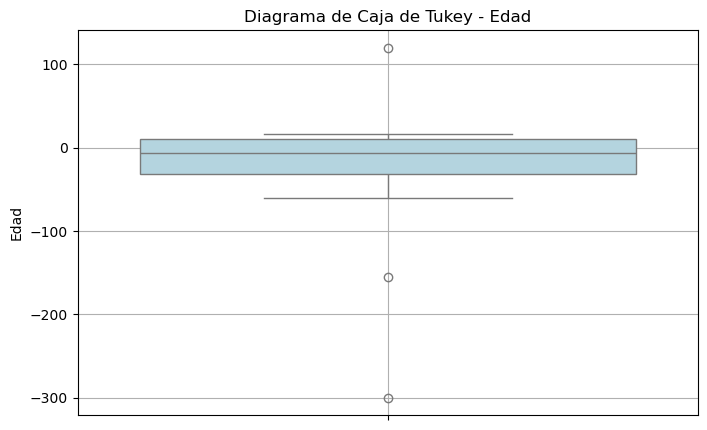

In [8]:
#Elimino los valores nulos de la columna edad
Estrellas=Estrellas.dropna(subset=["Edad"])

#Calculo los quatiles de la columna edad
Q1=Estrellas["Edad"].quantile(0.25)
Q3=Estrellas["Edad"].quantile(0.75)

#Calculo el rango intercuartilico
Ric=Q3-Q1

#Calculo los bigotes
Bigote_inf=Q1-1.5*Ric
Bigote_sup=Q3+1.5*Ric

#Defino los limites 
# Definir los intervalos para valores atípicos leves y extremos
lim_inf_extremo = Q1 - 3 * Ric
lim_sup_extremo = Q3 + 3 * Ric

# Identifico valores atípicos leves y extremos
valores_atipicos_leves = Estrellas[(Estrellas["Edad"] < Bigote_inf) | (Estrellas["Edad"] > Bigote_sup)]["Edad"].tolist()
valores_atipicos_extremos = Estrellas[(Estrellas["Edad"] < lim_inf_extremo) | (Estrellas["Edad"] > lim_sup_extremo)]["Edad"].tolist()

# Creo la tabla con los valores calculados
tabla_boxplot = pd.DataFrame({
    "Valor": [np.median(Estrellas["Edad"])],
    "Q1": [Q1],
    "Q3": [Q3],
    "RI": [Ric],
    "Bigote Inferior": [Bigote_inf],
    "Bigote Superior": [Bigote_sup],
    "Intervalo Atípicos Leves": [f"({Bigote_inf}; {Bigote_sup})"],
    "Valores Atípicos Leves": [valores_atipicos_leves],
    "Intervalo Atípicos Extremos": [f"({lim_inf_extremo}; {lim_sup_extremo})"],
    "Valores Atípicos Extremos": [valores_atipicos_extremos]
})

# Mostrar la tabla en formato tabular
print("\n===== Valores del Diagrama de Caja =====\n")
print(tabulate(tabla_boxplot, headers="keys", tablefmt="grid"))

# Creo el Diagrama de Caja de Tukey
plt.figure(figsize=(8, 5))
sns.boxplot(y=Estrellas["Edad"], color="lightblue")
plt.title("Diagrama de Caja de Tukey - Edad")
plt.ylabel("Edad")
plt.grid(True)

# Mostrar gráfico
plt.show()